# import the module

In [1]:
import pandas as pd
import os
import numpy as np

from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import KFold

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

os.chdir("D:/WorkPath/PycharmProjects/MutTm-pred")
from Dataset.Process4Dataset.DatasetCeator4PonDT import Dataset4MutTm
from MachineLearning.Util import train_validation_test

# 1. ESM650M

In [2]:
dataset_esm650m = Dataset4MutTm(package_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\Process4Dataset",
                          train_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\PonDB\pH-Tm\PonDB.csv",
                          test_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\pH-Tm\excllent_ProThermDB_Testing.csv",
                          training_version="PonDB_withpHTm",
                          testing_version="ProThermDBTest_withpHTm",
                          selected_columns=["UniProt_ID", "Mutation", "pH", "Tm", "ΔTm"],
                          features=["neighbor", "aaindex", "group", "param", "rpm", "hydrop", "GO", "context_embedding"],
                          context_length=200,
                          embedding_model_path="DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D",
                          embedding_model_name="ESM-2-650M",
                          embedding_method="sub")

esm650m_train_feature = np.array(dataset_esm650m.train_feature_set)
esm650m_train_label = np.array(dataset_esm650m.train_label_set).ravel()
esm650m_test_feature = np.array(dataset_esm650m.test_feature_set)
esm650m_test_leabel = np.array(dataset_esm650m.test_label_set).ravel()

当前使用设备：  NVIDIA GeForce RTX 4070 Ti SUPER
===正在从训练集版本为PonDB_withpHTm、训练集版本为ProThermDBTest_withpHTm的原始数据集中进行数据清洗和生物特征提取工作===
1.预处理训练集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-前一数据集采用了后一数据集中的0条数据，现已删除
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了49个UniProtID无法获取序列的数据
-删除了2989条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条379个突变位点对应错误的数据
2.预处理测试集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了0个UniProtID无法获取序列的数据
-删除了137条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条10个突变位点对应错误的数据
3.为训练集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.494685649871826
-释放模型后显存用量: 0.011113166809082031
4.为测试集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.011113166809082031
5.利用GO富集分析从训练集和测试集中提取LR与PA值
-获取[GO]特征.....

100%|██████████| 213/213 [00:00<00:00, 10359.79it/s]


6.从全数据集中提取生物特征集、标签集和基本信息集...
7.数据清洗和生物特征提取工作完成==>当前显存用量:0.0079345703125


Starting Training...
[LightGBM] [Info] Total Bins 141709
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1152
[LightGBM] [Info] Start training from score -2.004381
Time for Training: 0.7540605068206787
[LightGBM] [Info] Total Bins 134412
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1149
[LightGBM] [Info] Start training from score -2.049294
[LightGBM] [Info] Total Bins 135319
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1149
[LightGBM] [Info] Start training from score -2.019805
[LightGBM] [Info] Total Bins 133134
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1147
[LightGBM] [Info] Start training from score -1.971033
[LightGBM] [Info] Total Bins 135026
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1149
[LightGBM] [Info] Start training from score -2.050462
[LightGBM] [Info] Tot

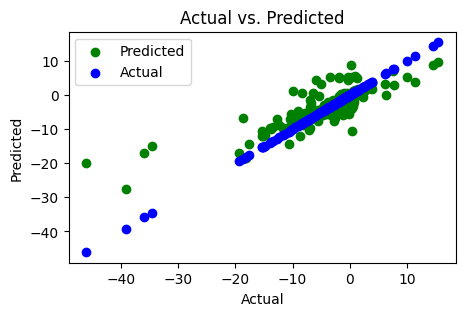

In [4]:
train_validation_test(LGBMRegressor(force_col_wise=True),
                      esm650m_train_feature,
                      esm650m_train_label,
                      esm650m_test_feature,
                      esm650m_test_leabel)

Starting Training...
Time for Training: 2.0893356800079346
The Result for CV:
MAE:2.0299
PCC:0.8807
R2:0.7735
RMSE:3.6016
Time for CV:9.645376682281494
Starting Testing...
The Result for Testing:MAE:3.9726
PCC:0.7429
R2:0.4753
RMSE:5.2459
Time for Testing:0.003999471664428711


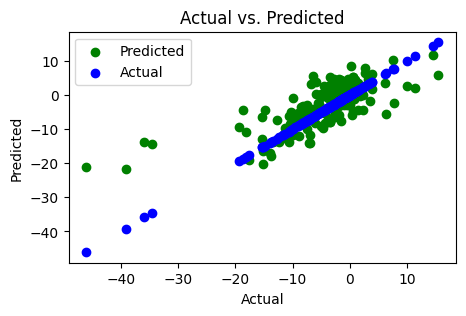

In [5]:
init_xgb_trainer = XGBRegressor()
train_validation_test(init_xgb_trainer,
                      esm650m_train_feature,
                      esm650m_train_label,
                      esm650m_test_feature,
                      esm650m_test_leabel)

# 2. ESM3B

In [3]:
dataset_esm3b = Dataset4MutTm(package_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\Process4Dataset",
                          train_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\PonDB\pH-Tm\PonDB.csv",
                          test_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\pH-Tm\excllent_ProThermDB_Testing.csv",
                          training_version="PonDB_withpHTm",
                          testing_version="ProThermDBTest_withpHTm",
                          selected_columns=["UniProt_ID", "Mutation", "pH", "Tm", "ΔTm"],
                          features=["neighbor", "aaindex", "group", "param", "rpm", "hydrop", "GO", "context_embedding"],
                          context_length=200,
                          embedding_model_path="DeepLearning/EmbeddingModels/ESM-2/esm2_t36_3B_UR50D",
                          embedding_model_name="ESM-2-3B",
                          embedding_method="sub")

esm3b_train_feature = np.array(dataset_esm3b.train_feature_set)
esm3b_train_label = np.array(dataset_esm3b.train_label_set).ravel()
esm3b_test_feature = np.array(dataset_esm3b.test_feature_set)
esm3b_test_leabel = np.array(dataset_esm3b.test_label_set).ravel()

当前使用设备：  NVIDIA GeForce RTX 4070 Ti SUPER
===正在从训练集版本为PonDB_withpHTm、训练集版本为ProThermDBTest_withpHTm的原始数据集中进行数据清洗和生物特征提取工作===
1.预处理训练集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-前一数据集采用了后一数据集中的0条数据，现已删除
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了49个UniProtID无法获取序列的数据
-删除了2989条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条379个突变位点对应错误的数据
2.预处理测试集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了0个UniProtID无法获取序列的数据
-删除了137条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条10个突变位点对应错误的数据
3.为训练集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t36_3B_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  10.735447883605957
-释放模型后显存用量: 0.011402130126953125
4.为测试集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t36_3B_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  10.735447883605957
-释放模型后显存用量: 0.011402130126953125
5.利用GO富集分析从训练集和测试集中提取LR与PA值
-获取[GO]特征.....

100%|██████████| 213/213 [00:00<00:00, 10073.03it/s]


6.从全数据集中提取生物特征集、标签集和基本信息集...
7.数据清洗和生物特征提取工作完成==>当前显存用量:0.0079345703125


Starting Training...
[LightGBM] [Info] Total Bins 141513
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1152
[LightGBM] [Info] Start training from score -2.004381
Time for Training: 0.645937442779541
[LightGBM] [Info] Total Bins 134457
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1149
[LightGBM] [Info] Start training from score -2.049294
[LightGBM] [Info] Total Bins 135291
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1149
[LightGBM] [Info] Start training from score -2.019805
[LightGBM] [Info] Total Bins 133267
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1147
[LightGBM] [Info] Start training from score -1.971033
[LightGBM] [Info] Total Bins 135003
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1149
[LightGBM] [Info] Start training from score -2.050462
[LightGBM] [Info] Tota

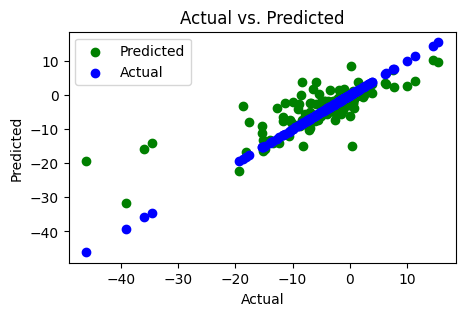

In [8]:
train_validation_test(LGBMRegressor(force_col_wise=True),
                      esm3b_train_feature,
                      esm3b_train_label,
                      esm3b_test_feature,
                      esm3b_test_leabel)

Starting Training...
Time for Training: 1.7914702892303467
The Result for CV:
MAE:2.0136
PCC:0.8828
R2:0.7776
RMSE:3.5722
Time for CV:8.578360080718994
Starting Testing...
The Result for Testing:MAE:3.1649
PCC:0.7213
R2:0.5189
RMSE:5.0232
Time for Testing:0.003000020980834961


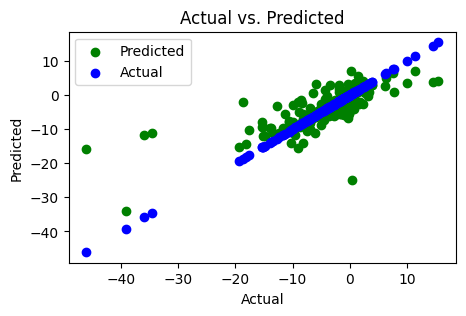

In [9]:
train_validation_test(XGBRegressor(),
                      esm3b_train_feature,
                      esm3b_train_label,
                      esm3b_test_feature,
                      esm3b_test_leabel)

# 3. ProtBert

In [2]:
dataset_bert = Dataset4MutTm(package_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\Process4Dataset",
                          train_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\PonDB\pH-Tm\PonDB.csv",
                          test_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\pH-Tm\excllent_ProThermDB_Testing.csv",
                          training_version="PonDB_withpHTm",
                          testing_version="ProThermDBTest_withpHTm",
                          selected_columns=["UniProt_ID", "Mutation", "pH", "Tm", "ΔTm"],
                          features=["neighbor", "aaindex", "group", "param", "rpm", "hydrop", "GO", "context_embedding"],
                          context_length=200,
                          embedding_model_path="DeepLearning/EmbeddingModels/ProtBert/ProtBert",
                          embedding_model_name="ProtBert",
                          embedding_method="sub")

bert_train_feature = np.array(dataset_bert.train_feature_set)
bert_train_label = np.array(dataset_bert.train_label_set).ravel()
bert_test_feature = np.array(dataset_bert.test_feature_set)
bert_test_leabel = np.array(dataset_bert.test_label_set).ravel()

当前使用设备：  NVIDIA GeForce RTX 4070 Ti SUPER
===正在从训练集版本为PonDB_withpHTm、训练集版本为ProThermDBTest_withpHTm的原始数据集中进行数据清洗和生物特征提取工作===
1.预处理训练集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-前一数据集采用了后一数据集中的0条数据，现已删除
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了49个UniProtID无法获取序列的数据
-删除了2989条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条379个突变位点对应错误的数据
2.预处理测试集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了0个UniProtID无法获取序列的数据
-删除了137条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条10个突变位点对应错误的数据
3.为训练集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...
嵌入模型后显存使用量:  1.5649614334106445
-释放模型后显存用量: 0.0079345703125
4.为测试集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[ps

100%|██████████| 213/213 [00:00<00:00, 10142.44it/s]


6.从全数据集中提取生物特征集、标签集和基本信息集...
7.数据清洗和生物特征提取工作完成==>当前显存用量:0.0079345703125


Starting Training...
[LightGBM] [Info] Total Bins 141822
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1152
[LightGBM] [Info] Start training from score -2.004381
Time for Training: 0.6872725486755371
[LightGBM] [Info] Total Bins 134545
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1149
[LightGBM] [Info] Start training from score -2.049294
[LightGBM] [Info] Total Bins 135349
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1149
[LightGBM] [Info] Start training from score -2.019805
[LightGBM] [Info] Total Bins 133196
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1147
[LightGBM] [Info] Start training from score -1.971033
[LightGBM] [Info] Total Bins 135072
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1149
[LightGBM] [Info] Start training from score -2.050462
[LightGBM] [Info] Tot

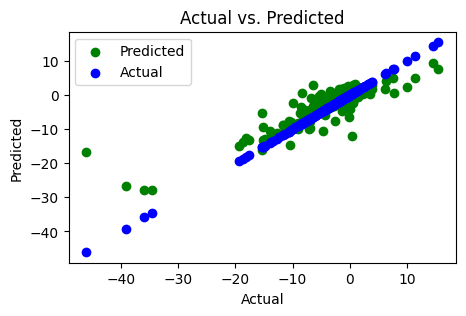

In [3]:
train_validation_test(LGBMRegressor(force_col_wise=True),
                      bert_train_feature,
                      bert_train_label,
                      bert_test_feature,
                      bert_test_leabel)

Starting Training...
Time for Training: 1.8539164066314697
The Result for CV:
MAE:2.0441
PCC:0.8808
R2:0.7738
RMSE:3.5924
Time for CV:8.917738437652588
Starting Testing...
The Result for Testing:MAE:3.0000
PCC:0.7878
R2:0.5961
RMSE:4.6023
Time for Testing:0.003000497817993164


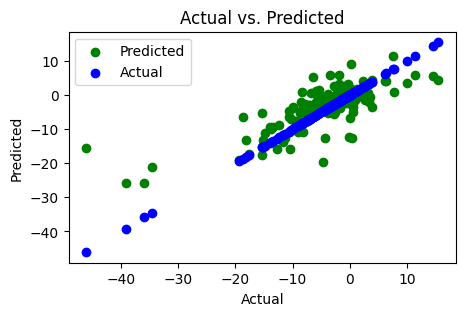

In [4]:
train_validation_test(XGBRegressor(),
                      bert_train_feature,
                      bert_train_label,
                      bert_test_feature,
                      bert_test_leabel)